In [1]:
library(ggplot2)

Warning message:
"package 'ggplot2' was built under R version 4.3.3"


In [2]:
grade_data = read.csv("C:/Users/Will/Desktop/School/ISYE 6203/Module 4 - Logistic Regression/Grades_Data.csv")

In [4]:
head(grade_data)

,Student,Grade,Hours
,<int>,<int>,<int>
1,1,0,38
2,2,0,30
3,3,0,40
4,4,0,40
5,5,0,52
6,6,0,23


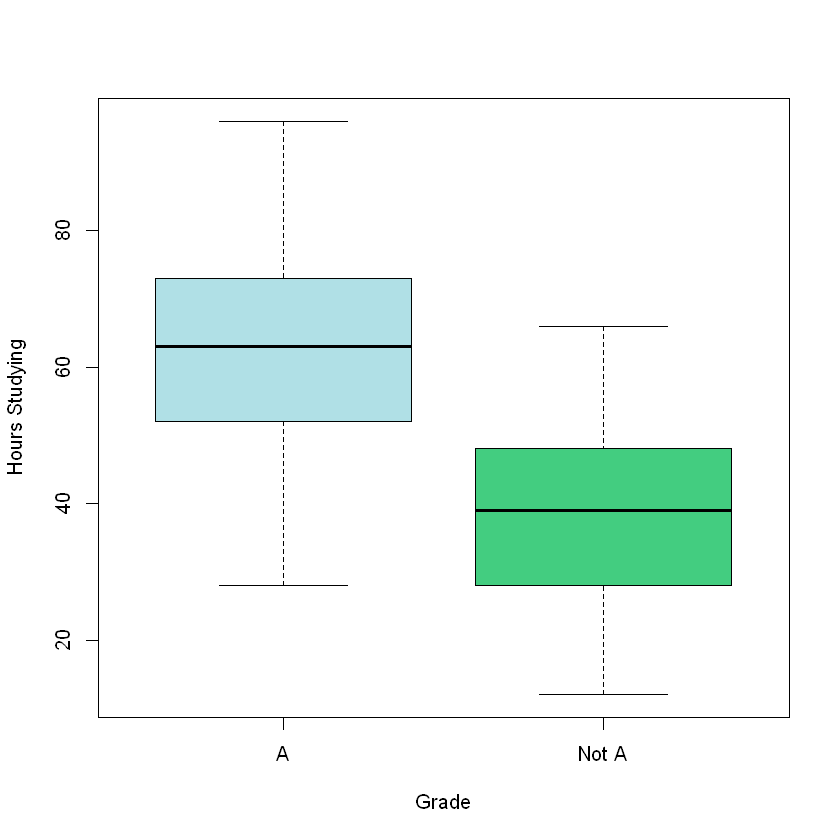

In [21]:
pass <- subset(grade_data, Grade == 1)
fail <- subset(grade_data, Grade == 0)

boxplot(pass$Hours,fail$Hours,names = c("A","Not A"),col=c("powderblue", "seagreen3"),ylab = "Hours Studying",xlab = "Grade")


Call:
lm(formula = Grade ~ Hours, data = grade_data)

Residuals:
    Min      1Q  Median      3Q     Max 
-0.7630 -0.3060 -0.0284  0.2883  0.8862 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -0.364520   0.111263  -3.276  0.00146 ** 
Hours        0.017084   0.002084   8.197 9.61e-13 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.3889 on 98 degrees of freedom
Multiple R-squared:  0.4068,	Adjusted R-squared:  0.4007 
F-statistic:  67.2 on 1 and 98 DF,  p-value: 9.606e-13


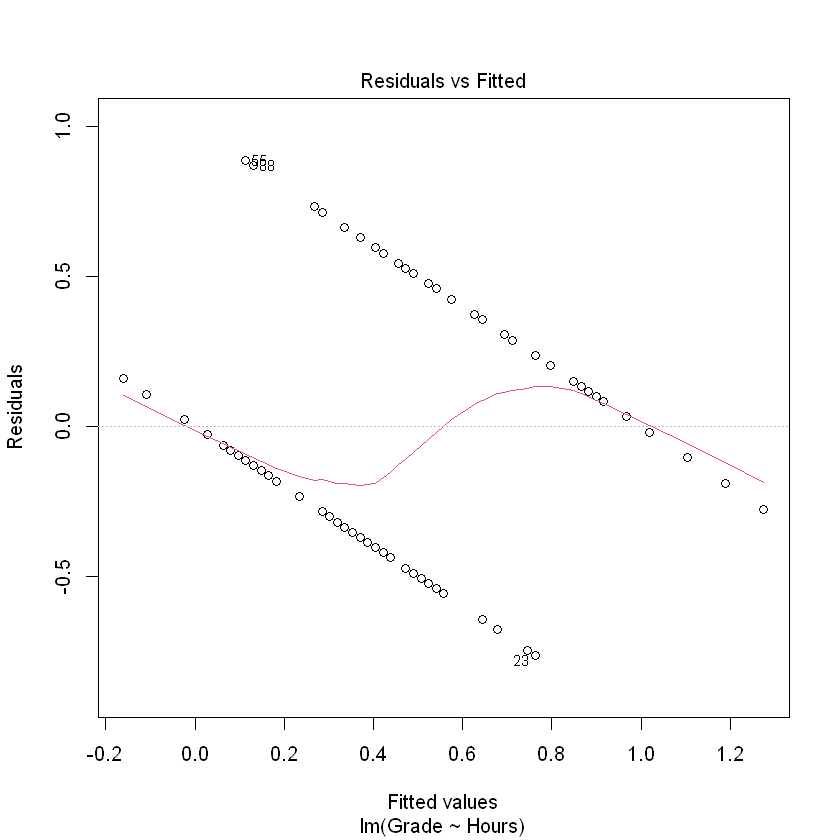

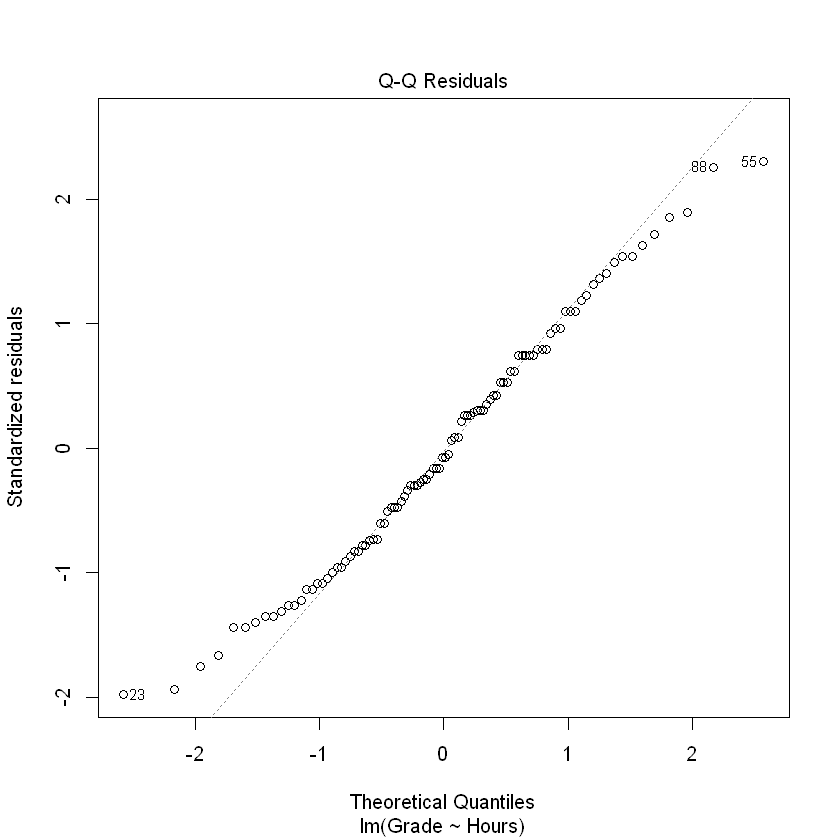

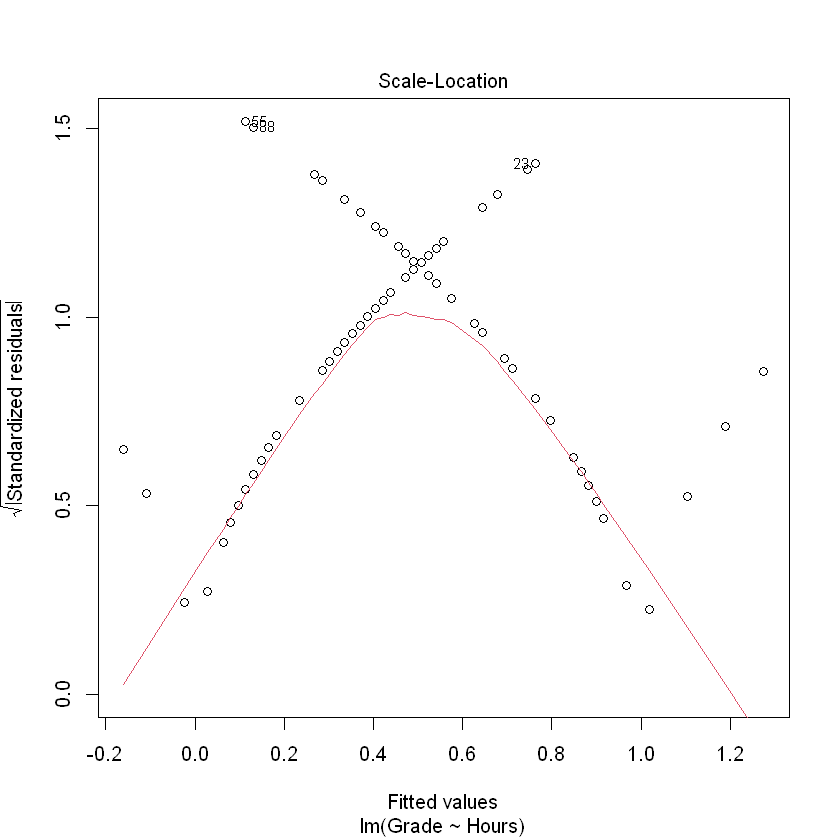

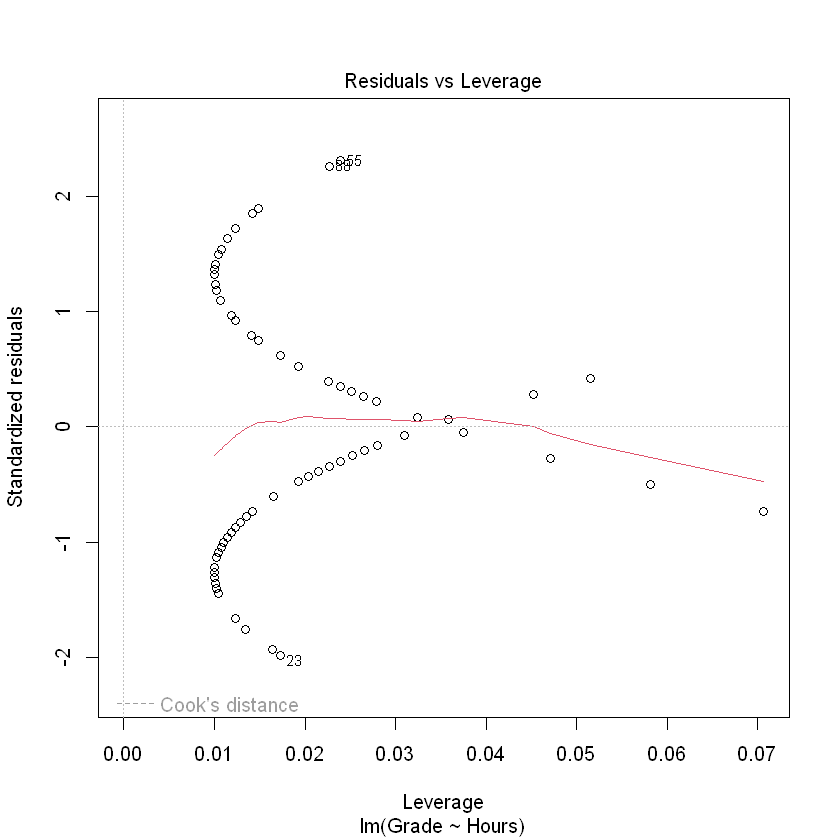

In [24]:
lin_reg = lm(Grade~Hours,data = grade_data)
summary(lin_reg)
plot(lin_reg)

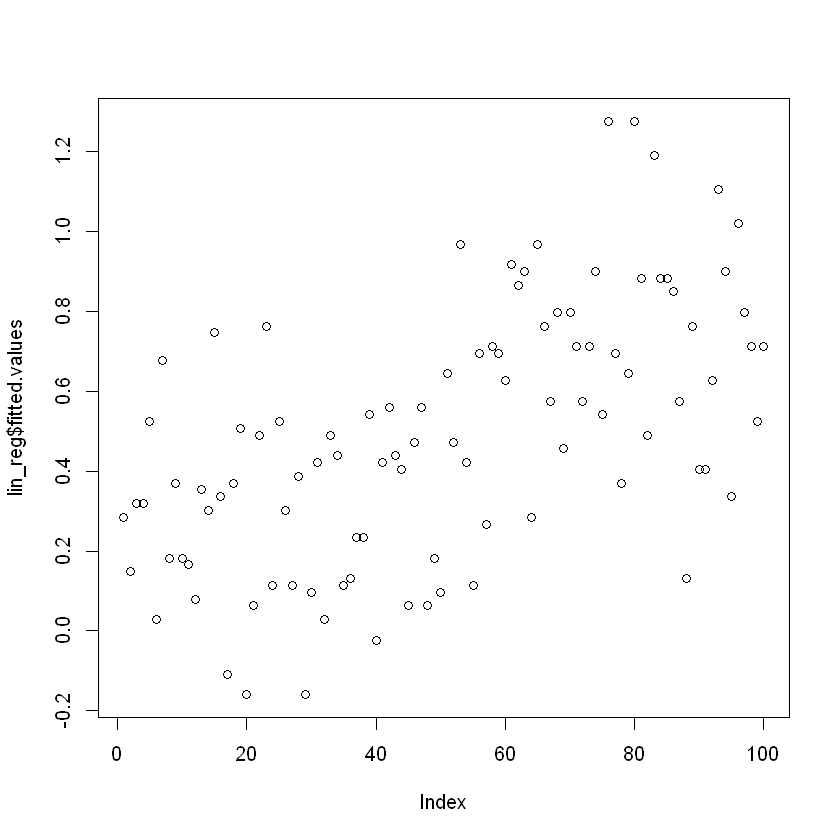

In [27]:
plot(lin_reg$fitted.values)

`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'


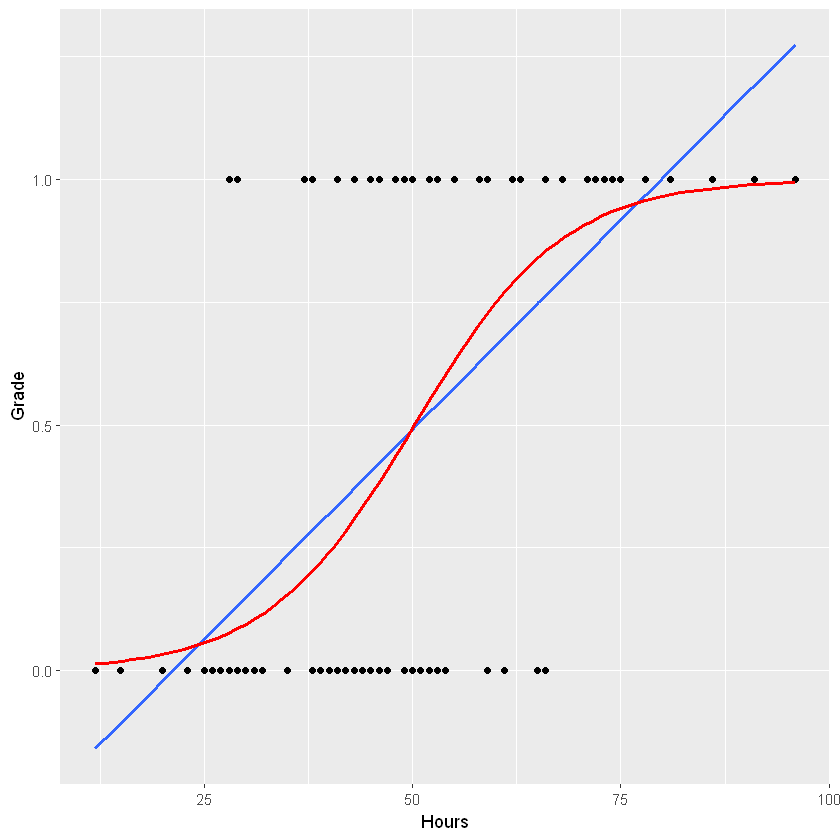

In [32]:
ggplot(grade_data, aes(x=Hours, y=Grade)) + geom_point() +
  scale_colour_hue(l=50) + # Use a slightly darker palette than normal
  geom_smooth(method=lm,   # Add linear regression lines
              se=FALSE,    # Don't add shaded confidence region
              fullrange=TRUE)+
              geom_smooth(method="glm", method.args=list(family="binomial"), se=FALSE, fullrange=TRUE, color="red") # Extend regression lines

In [33]:
logistic_reg = glm(Grade~Hours,data = grade_data,family = binomial)


In [35]:
library(ISLR)

Warning message:
"package 'ISLR' was built under R version 4.3.3"


In [4]:
test_data = ISLR::Default

In [5]:
head(test_data)

,default,student,balance,income
,<fct>,<fct>,<dbl>,<dbl>
1,No,No,729.5265,44361.625
2,No,Yes,817.1804,12106.135
3,No,No,1073.5492,31767.139
4,No,No,529.2506,35704.494
5,No,No,785.6559,38463.496
6,No,Yes,919.5885,7491.559


In [6]:
test_data$dft = ifelse(test_data$default=="Yes",1,0)
test_data$stdt = ifelse(test_data$student=="Yes",1,0)

In [7]:
head(test_data)

,default,student,balance,income,dft,stdt
,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>
1,No,No,729.5265,44361.625,0,0
2,No,Yes,817.1804,12106.135,0,1
3,No,No,1073.5492,31767.139,0,0
4,No,No,529.2506,35704.494,0,0
5,No,No,785.6559,38463.496,0,0
6,No,Yes,919.5885,7491.559,0,1


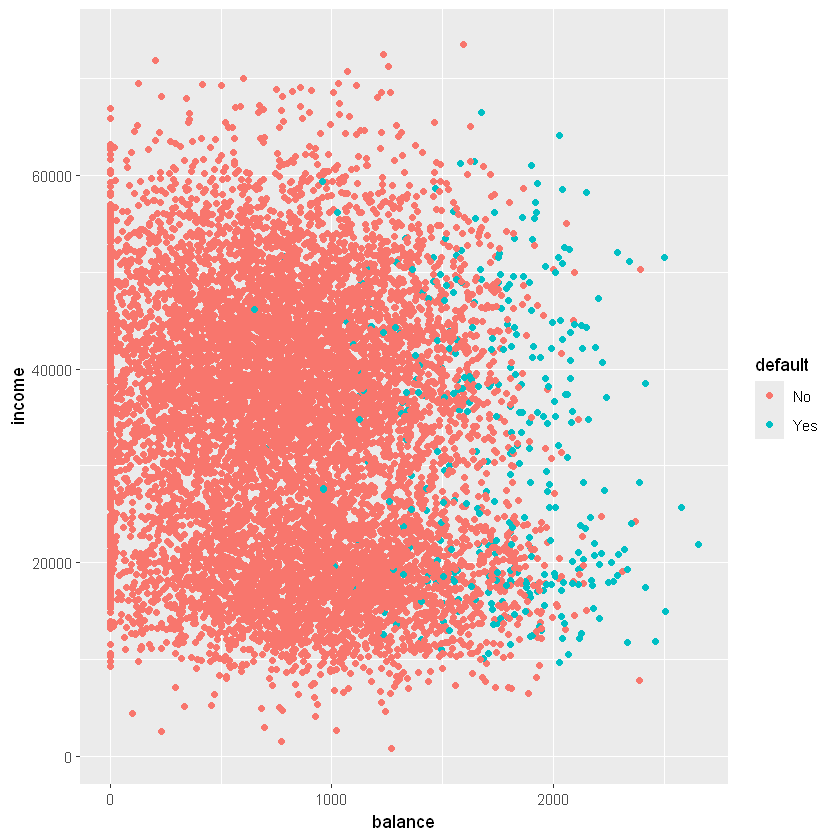

In [8]:
ggplot(test_data,aes(x = balance,y=income,col=default))+geom_point()


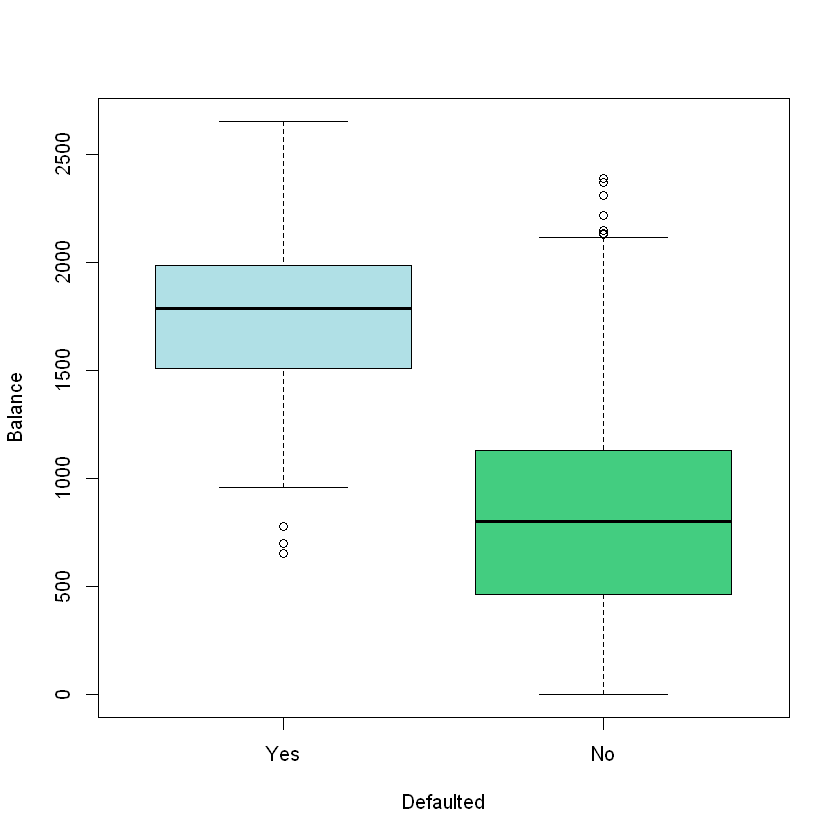

In [53]:
deafulted = subset(test_data,default=="Yes")
no_default = subset(test_data,default=="No")

boxplot(deafulted$balance,no_default$balance,names = c("Yes","No"),col=c("powderblue", "seagreen3"),ylab = "Balance",xlab = "Defaulted")

In [9]:
no_predictors_logit = glm(dft~1,data = test_data,family = "binomial")
summary(no_predictors_logit)


Call:
glm(formula = dft ~ 1, family = "binomial", data = test_data)

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept) -3.36833    0.05574  -60.43   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 2920.6  on 9999  degrees of freedom
Residual deviance: 2920.6  on 9999  degrees of freedom
AIC: 2922.6

Number of Fisher Scoring iterations: 6


In [55]:
single_predictors_logit = glm(dft~stdt,data = test_data,family = "binomial")
summary(single_predictors_logit)


Call:
glm(formula = dft ~ stdt, family = "binomial", data = test_data)

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept) -3.50413    0.07071  -49.55  < 2e-16 ***
stdt         0.40489    0.11502    3.52 0.000431 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 2920.6  on 9999  degrees of freedom
Residual deviance: 2908.7  on 9998  degrees of freedom
AIC: 2912.7

Number of Fisher Scoring iterations: 6


In [56]:
single_cont_predictors_logit = glm(dft~balance,data = test_data,family = "binomial")
summary(single_cont_predictors_logit)


Call:
glm(formula = dft ~ balance, family = "binomial", data = test_data)

Coefficients:
              Estimate Std. Error z value Pr(>|z|)    
(Intercept) -1.065e+01  3.612e-01  -29.49   <2e-16 ***
balance      5.499e-03  2.204e-04   24.95   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 2920.6  on 9999  degrees of freedom
Residual deviance: 1596.5  on 9998  degrees of freedom
AIC: 1600.5

Number of Fisher Scoring iterations: 8


In [10]:
multiple_predictors_logit = glm(dft~balance+income+stdt,data = test_data,family = "binomial")
summary(multiple_predictors_logit)


Call:
glm(formula = dft ~ balance + income + stdt, family = "binomial", 
    data = test_data)

Coefficients:
              Estimate Std. Error z value Pr(>|z|)    
(Intercept) -1.087e+01  4.923e-01 -22.080  < 2e-16 ***
balance      5.737e-03  2.319e-04  24.738  < 2e-16 ***
income       3.033e-06  8.203e-06   0.370  0.71152    
stdt        -6.468e-01  2.363e-01  -2.738  0.00619 ** 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 2920.6  on 9999  degrees of freedom
Residual deviance: 1571.5  on 9996  degrees of freedom
AIC: 1579.5

Number of Fisher Scoring iterations: 8


In [58]:
library(dplyr)


Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union




In [60]:
test_data = test_data %>% mutate(pred_prob_model_4=predict(multiple_predictors_logit,newdata = .,type = "response")) %>%
mutate(pred_outcome_model_4 = ifelse(pred_prob_model_4>=.5,1,0))

In [62]:
head(test_data)

,default,student,balance,income,dft,stdt,pred_prob_model_4,pred_outcome_model_4
,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,No,No,729.5265,44361.625,0,0,0.0014287239,0
2,No,Yes,817.1804,12106.135,0,1,0.0011222039,0
3,No,No,1073.5492,31767.139,0,0,0.0098122716,0
4,No,No,529.2506,35704.494,0,0,0.0004415893,0
5,No,No,785.6559,38463.496,0,0,0.0019355062,0
6,No,Yes,919.5885,7491.559,0,1,0.0019895182,0


In [64]:
xtabs(~dft+pred_outcome_model_4,data=test_data)

   pred_outcome_model_4
dft    0    1
  0 9627   40
  1  228  105

In [66]:
install.packages("ggExtra")
install.packages("ROCR")

Installing package into 'C:/Users/Will/AppData/Local/R/win-library/4.3'
(as 'lib' is unspecified)

also installing the dependencies 'fastmap', 'htmlwidgets', 'httpuv', 'xtable', 'sourcetools', 'later', 'promises', 'cachem', 'colourpicker', 'miniUI', 'shiny', 'shinyjs'




package 'fastmap' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'fastmap'"
Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"problem copying C:\Users\Will\AppData\Local\R\win-library\4.3\00LOCK\fastmap\libs\x64\fastmap.dll to C:\Users\Will\AppData\Local\R\win-library\4.3\fastmap\libs\x64\fastmap.dll: Permission denied"
Warning message:
"restored 'fastmap'"


package 'htmlwidgets' successfully unpacked and MD5 sums checked
package 'httpuv' successfully unpacked and MD5 sums checked
package 'xtable' successfully unpacked and MD5 sums checked
package 'sourcetools' successfully unpacked and MD5 sums checked
package 'later' successfully unpacked and MD5 sums checked
package 'promises' successfully unpacked and MD5 sums checked
package 'cachem' successfully unpacked and MD5 sums checked
package 'colourpicker' successfully unpacked and MD5 sums checked
package 'miniUI' successfully unpacked and MD5 sums checked
package 'shiny' successfully unpacked and MD5 sums checked
package 'shinyjs' successfully unpacked and MD5 sums checked
package 'ggExtra' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Will\AppData\Local\Temp\RtmpEHLXKf\downloaded_packages


Installing package into 'C:/Users/Will/AppData/Local/R/win-library/4.3'
(as 'lib' is unspecified)

also installing the dependencies 'gtools', 'caTools', 'gplots'




package 'gtools' successfully unpacked and MD5 sums checked
package 'caTools' successfully unpacked and MD5 sums checked
package 'gplots' successfully unpacked and MD5 sums checked
package 'ROCR' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Will\AppData\Local\Temp\RtmpEHLXKf\downloaded_packages


In [68]:
library(ggExtra)
library(ROCR)

Warning message:
"package 'ROCR' was built under R version 4.3.3"


[1] "prediction"
attr(,"package")
[1] "ROCR"

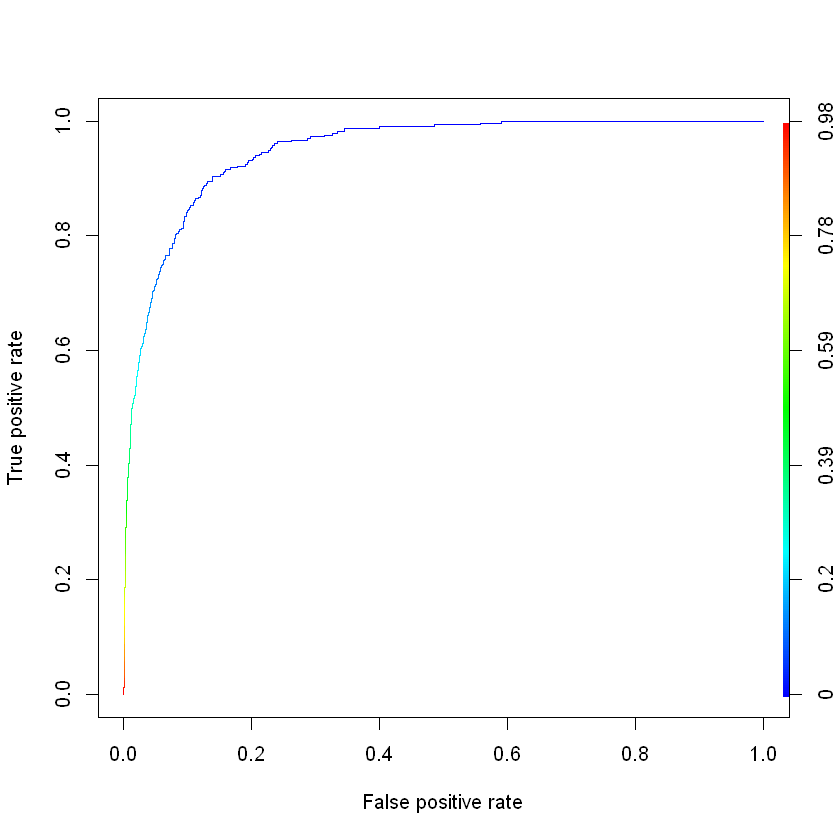

In [69]:
pred = prediction(test_data$pred_prob_model_4,test_data$dft)
class(pred)
perf = performance(pred,"tpr","fpr") #tpr and fpr are true and false postive rates
plot(perf,colorize=T)

In [70]:
#calc area under the curve
auc.perf = performance(pred,measure = "auc")
auc.perf@y.values

[[1]]
[1] 0.9495581